##  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from IPython.display import display

##  Reading Data

In [2]:
df=pd.read_csv('New_York_Stock.csv')

# Display a Simple

In [3]:
df.head()

,Unnamed: 0,Ticker Symbol,Accounts Payable,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Common Stocks,Cost of Revenue,...,Quick Ratio,Research and Development,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Estimated Shares Outstanding
0,0,AAL,NaN,23.0,-1.888000e+09,NaN,53.0,1.330000e+09,127000000.0,NaN,...,72.0,0.0,3.412000e+09,NaN,7.072000e+09,9.011000e+09,2.489100e+10,1.690400e+10,2.485500e+10,3.350000e+08
1,1,AAL,4.975000e+09,NaN,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,5000000.0,1.101900e+10,...,96.0,0.0,NaN,NaN,NaN,NaN,NaN,4.227800e+10,NaN,1.630222e+08
2,2,AAL,4.668000e+09,143.0,NaN,1.513500e+10,60.0,1.768000e+09,7000000.0,NaN,...,80.0,0.0,NaN,4.322500e+10,NaN,NaN,4.120400e+10,4.322500e+10,4.265000e+10,7.169154e+08
3,3,AAL,5.102000e+09,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,6000000.0,1.109600e+10,...,NaN,0.0,5.864000e+09,4.841500e+10,9.985000e+09,1.360500e+10,NaN,4.841500e+10,NaN,6.681299e+08
4,4,AAP,NaN,32.0,-2.711820e+08,5.202150e+08,NaN,5.981110e+08,7000.0,3.106967e+09,...,34.0,0.0,0.000000e+00,NaN,3.184200e+09,NaN,3.403120e+09,4.613814e+09,6.205003e+09,7.328355e+07


## Display some Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        800 non-null    int64  
 1   Ticker Symbol                     800 non-null    object 
 2   Accounts Payable                  646 non-null    float64
 3   After Tax ROE                     645 non-null    float64
 4   Capital Expenditures              647 non-null    float64
 5   Capital Surplus                   651 non-null    float64
 6   Cash Ratio                        529 non-null    float64
 7   Cash and Cash Equivalents         647 non-null    float64
 8   Common Stocks                     646 non-null    float64
 9   Cost of Revenue                   648 non-null    float64
 10  Current Ratio                     529 non-null    float64
 11  Deferred Asset Charges            643 non-null    float64
 12  Deprecia

In [5]:
df.describe()

,Unnamed: 0,Accounts Payable,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Common Stocks,Cost of Revenue,Current Ratio,...,Quick Ratio,Research and Development,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Estimated Shares Outstanding
count,800.0000,6.460000e+02,645.000000,6.470000e+02,6.510000e+02,529.000000,6.470000e+02,6.460000e+02,6.480000e+02,529.000000,...,520.000000,6.540000e+02,6.440000e+02,6.480000e+02,6.470000e+02,6.500000e+02,6.490000e+02,6.470000e+02,6.470000e+02,8.000000e+02
mean,399.5000,4.971211e+09,42.226357,-1.389969e+09,5.774598e+09,71.646503,8.812486e+09,2.303722e+09,1.227549e+10,186.497164,...,146.048077,3.527949e+08,1.169803e+09,5.651659e+10,7.677934e+09,4.998938e+09,4.453004e+10,6.103424e+10,1.981053e+10,5.230652e+08
std,231.0844,1.292304e+10,213.729712,3.189622e+09,1.141686e+10,97.562887,5.300856e+10,1.317448e+10,2.593540e+10,135.617319,...,130.724274,1.064373e+09,4.998252e+09,1.971271e+11,1.597441e+10,1.038209e+10,1.760464e+11,2.246002e+11,3.359307e+10,1.136277e+09
min,0.0000,0.000000e+00,0.000000,-3.798500e+10,0.000000e+00,0.000000,2.100000e+04,0.000000e+00,0.000000e+00,17.000000,...,10.000000,0.000000e+00,0.000000e+00,2.705000e+06,0.000000e+00,0.000000e+00,2.548730e+08,7.188000e+06,1.514000e+06,-4.272727e+08
25%,199.7500,6.467378e+08,9.000000,-1.193870e+09,4.894000e+08,19.000000,3.371925e+08,2.000000e+06,1.179324e+09,114.000000,...,75.000000,0.000000e+00,0.000000e+00,6.889942e+09,1.043057e+09,5.831580e+08,4.046000e+09,6.872001e+09,3.786342e+09,1.215108e+08
50%,399.5000,1.471036e+09,16.000000,-4.583000e+08,2.324800e+09,39.000000,9.120000e+08,9.829500e+06,3.647840e+09,148.000000,...,111.500000,0.000000e+00,0.000000e+00,1.731475e+10,2.833969e+09,1.827903e+09,1.036800e+10,1.693130e+10,8.570000e+09,2.531360e+08
75%,599.2500,3.851000e+09,24.000000,-1.416055e+08,6.613082e+09,85.000000,2.472500e+09,2.890958e+08,9.886192e+09,219.000000,...,171.250000,7.658650e+07,2.301632e+08,4.445742e+10,6.519500e+09,4.697580e+09,2.829500e+10,4.321375e+10,1.790480e+10,4.885669e+08
max,799.0000,1.485790e+11,3650.000000,5.000000e+06,1.082880e+11,1024.000000,6.266260e+11,1.581420e+11,1.633360e+11,1197.000000,...,1197.000000,1.004500e+10,5.812500e+10,2.209974e+12,1.318390e+11,9.028100e+10,1.973018e+12,2.209974e+12,2.337150e+11,1.610769e+10


# Missing_Values Before Handling

In [6]:
df.isnull().sum()  

Unnamed: 0                            0
Ticker Symbol                         0
Accounts Payable                    154
After Tax ROE                       155
Capital Expenditures                153
Capital Surplus                     149
Cash Ratio                          271
Cash and Cash Equivalents           153
Common Stocks                       154
Cost of Revenue                     152
Current Ratio                       271
Deferred Asset Charges              157
Depreciation                        155
Earnings Before Interest and Tax    151
Earnings Before Tax                 151
Effect of Exchange Rate             152
Fixed Assets                        153
Goodwill                            151
Gross Margin                        153
Gross Profit                        156
Intangible Assets                   152
Interest Expense                    153
Inventory                           152
Long-Term Debt                      152
Minority Interest                   153


In [7]:
missing_values = df.isnull().sum()  


C:\Users\MANDO\AppData\Local\Temp\ipykernel_7340\1848909344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


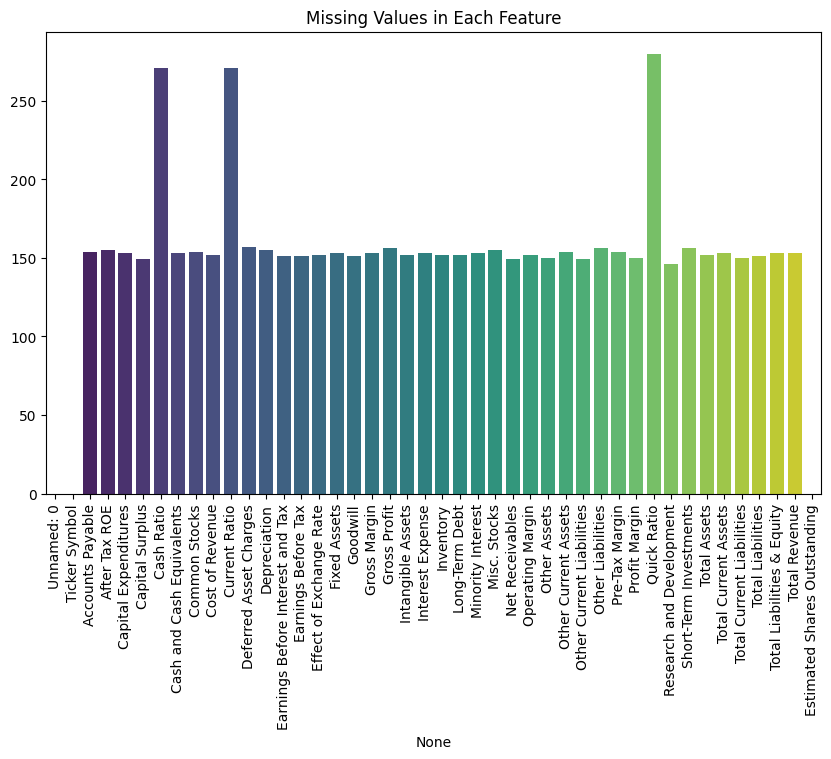

In [8]:
plt.figure(figsize=(10, 6))

sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

plt.xticks(rotation=90)

plt.title("Missing Values in Each Feature")

plt.show()

# Missing_Values After Handling

In [9]:
data = df  
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Unnamed: 0                          0
Ticker Symbol                       0
Accounts Payable                    0
After Tax ROE                       0
Capital Expenditures                0
Capital Surplus                     0
Cash Ratio                          0
Cash and Cash Equivalents           0
Common Stocks                       0
Cost of Revenue                     0
Current Ratio                       0
Deferred Asset Charges              0
Depreciation                        0
Earnings Before Interest and Tax    0
Earnings Before Tax                 0
Effect of Exchange Rate             0
Fixed Assets                        0
Goodwill                            0
Gross Margin                        0
Gross Profit                        0
Intangible Assets                   0
Interest Expense                    0
Inventory                           0
Long-Term Debt                      0
Minority Interest                   0
Misc. Stocks       

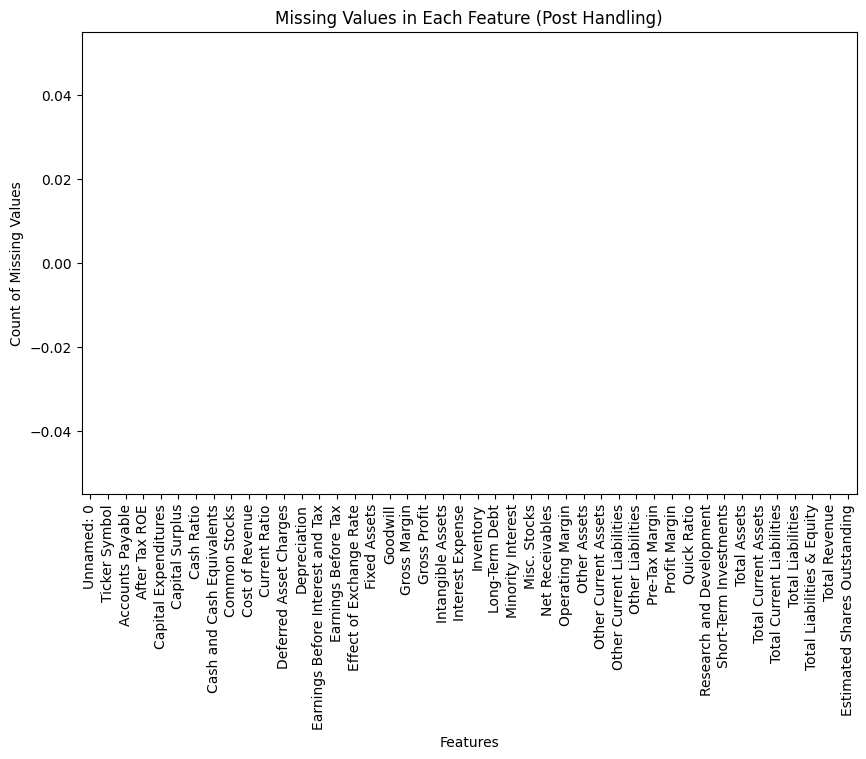

In [10]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Feature (Post Handling)")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.show()

## Feature Extraction

In [11]:
df.columns


Index(['Unnamed: 0', 'Ticker Symbol', 'Accounts Payable', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate', 'Fixed Assets', 'Goodwill', 'Gross Margin',
       'Gross Profit', 'Intangible Assets', 'Interest Expense', 'Inventory',
       'Long-Term Debt', 'Minority Interest', 'Misc. Stocks',
       'Net Receivables', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities',
       'Other Liabilities', 'Pre-Tax Margin', 'Profit Margin', 'Quick Ratio',
       'Research and Development', 'Short-Term Investments', 'Total Assets',
       'Total Current Assets', 'Total Current Liabilities',
       'Total Liabilities', 'Total Liabilities & Equity', 'Total Revenue',
       'Estimated Shares Out

# Lebel_Encoding


In [12]:
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  
        df_encoded[col] = le.fit_transform(df_encoded[col])
df=df_encoded
df.head(3)

,Unnamed: 0,Ticker Symbol,Accounts Payable,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Common Stocks,Cost of Revenue,...,Quick Ratio,Research and Development,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Estimated Shares Outstanding
0,0,0,4.971211e+09,23.000000,-1.888000e+09,5.774598e+09,53.0,1.330000e+09,127000000.0,1.227549e+10,...,72.0,0.0,3.412000e+09,5.651659e+10,7.072000e+09,9.011000e+09,2.489100e+10,1.690400e+10,2.485500e+10,3.350000e+08
1,1,0,4.975000e+09,42.226357,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,5000000.0,1.101900e+10,...,96.0,0.0,1.169803e+09,5.651659e+10,7.677934e+09,4.998938e+09,4.453004e+10,4.227800e+10,1.981053e+10,1.630222e+08
2,2,0,4.668000e+09,143.000000,-1.389969e+09,1.513500e+10,60.0,1.768000e+09,7000000.0,1.227549e+10,...,80.0,0.0,1.169803e+09,4.322500e+10,7.677934e+09,4.998938e+09,4.120400e+10,4.322500e+10,4.265000e+10,7.169154e+08


# Splitting the dataset to X (Feature) and Y (Target)

In [13]:
X=df.drop(['Estimated Shares Outstanding'],axis=1)
Y=df['Estimated Shares Outstanding']

## Data Split to train & test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##  Feature Scaling

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Dimention Reduction

In [16]:
pca = PCA()
pca = PCA(n_components=5)  
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [17]:
pd.DataFrame( data = x_train, columns=["PCA1", "PCA2","PCA3","PCA4","PCA5"])

,PCA1,PCA2,PCA3,PCA4,PCA5
0,1.966863,-1.611742,-0.610201,-0.608587,0.422259
1,-1.382882,0.822075,1.779653,-1.612506,-0.078641
2,-1.195648,0.430082,-0.929907,0.155912,-0.179289
3,-0.784356,-0.116089,-0.046061,-0.979310,0.255952
4,-1.331157,0.150941,-1.176463,-0.450811,0.166911
...,...,...,...,...,...
635,-1.036971,0.747255,0.067984,-0.002856,1.328506
636,-1.461348,1.077196,0.775854,1.116533,0.169788
637,-1.233784,0.450898,-1.125249,-0.485450,0.567747
638,0.863958,-0.791589,-0.867409,1.135097,-0.253262


##  Simple Linear Regression

In [18]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
y_train_pred = regressor.predict(x_train)

In [20]:
y_test_pred = regressor.predict(x_test)


In [21]:
MSE = mean_squared_error(y_train, y_train_pred)
MAE = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error: {MSE:.4f}')
print(f'Mean Absolute Error: {MAE:.4f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 588266602900468096.0000
Mean Absolute Error: 335726986.0522
R-squared: 0.49


In [22]:
MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error: {MSE:.4f}')
print(f'Mean Absolute Error: {MAE:.4f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 716436156439752960.0000
Mean Absolute Error: 369963105.7533
R-squared: 0.62


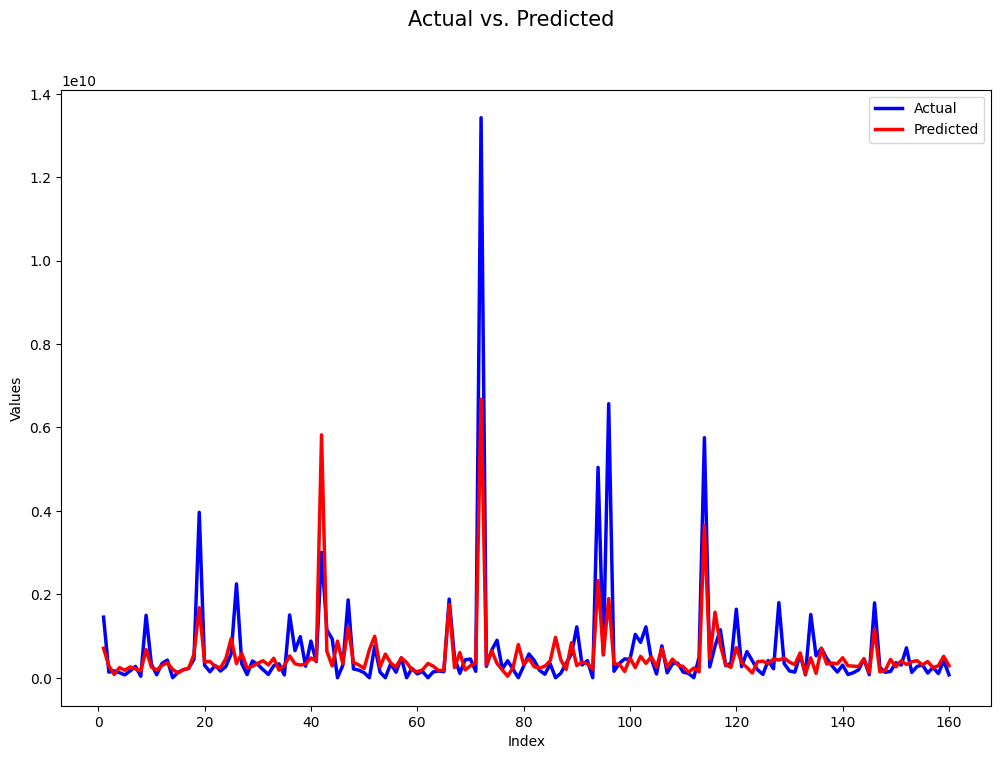

In [23]:
c = [i for i in range(1, 161)]  
fig = plt.figure(figsize=(12, 8))
plt.plot(c, y_test, color="blue", linewidth=2.5, label="Actual")
plt.plot(c, y_test_pred, color="red", linewidth=2.5, label="Predicted")
fig.suptitle('Actual vs. Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

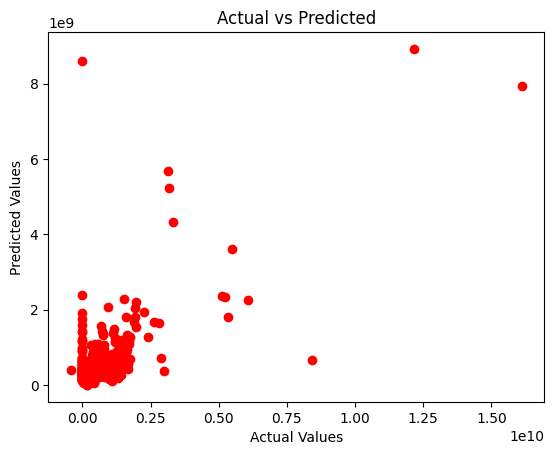

In [24]:
plt.scatter(y_train, y_train_pred,color ="red")
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [25]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})

print("Actual vs Predicted Table:")
display(results_df.head(10))  

Actual vs Predicted Table:


,Actual Values,Predicted Values
696,1.452593e+09,7.057011e+08
667,1.336066e+08,2.869766e+08
63,1.636250e+08,7.814137e+07
533,1.213103e+08,2.428111e+08
66,6.805529e+07,1.793166e+08
621,1.652518e+08,2.585883e+08
346,2.719298e+08,2.103945e+08
490,3.652605e+07,1.628430e+08
760,1.496700e+09,6.753276e+08
456,3.213194e+08,2.550059e+08


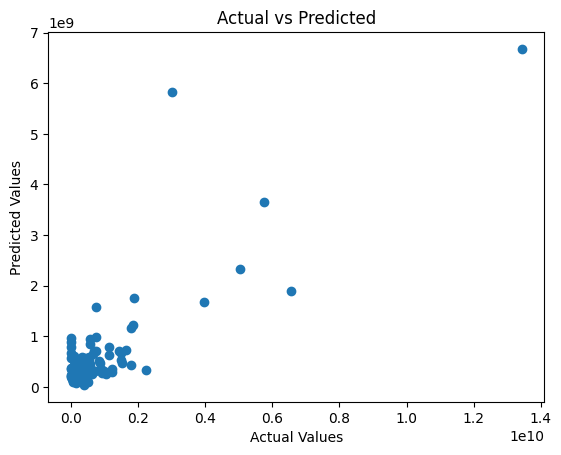

In [26]:
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [27]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})

print("Actual vs Predicted Table:")
display(results_df.head(10))  

Actual vs Predicted Table:


,Actual Values,Predicted Values
696,1.452593e+09,7.057011e+08
667,1.336066e+08,2.869766e+08
63,1.636250e+08,7.814137e+07
533,1.213103e+08,2.428111e+08
66,6.805529e+07,1.793166e+08
621,1.652518e+08,2.585883e+08
346,2.719298e+08,2.103945e+08
490,3.652605e+07,1.628430e+08
760,1.496700e+09,6.753276e+08
456,3.213194e+08,2.550059e+08


## Predict Unseen Data

In [28]:
new_data = np.array([[74.96714153, 56.99677718, 8.64964345, 20.46096221, 1,2,3,4,5,6,7,8,9,10,11,1,2,13,14,15,
                        16,17,181,19,20,21,212,23,24,25,26,27,28,29,20,30,31,32,33,344,45,36,37]])  # 43 features
new_data_scaled = sc.transform(new_data)  
new_data_pca = pca.transform(new_data_scaled)  

PREDICTION = regressor.predict(new_data_pca)
input_data_str = ''.join(str(x) for x in new_data[0])  

print(f"Input data: [{input_data_str}], Predicted value: {PREDICTION[0]}")

Input data: [74.9671415356.996777188.6496434520.460962211.02.03.04.05.06.07.08.09.010.011.01.02.013.014.015.016.017.0181.019.020.021.0212.023.024.025.026.027.028.029.020.030.031.032.033.0344.045.036.037.0], Predicted value: -37621732.783163786


d:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## RandomForestRegressor

In [29]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
y_test_pred = regressor.predict(x_test)
y_train_pred_rand = regressor.predict(x_train)

In [31]:
print('R2 = ', r2_score(y_train, y_train_pred_rand))
print('MAE = ', mean_absolute_error(y_train, y_train_pred_rand))
print('MRSE = ', mean_squared_error(y_train, y_train_pred_rand))

R2 =  0.9052653627278131
MAE =  124866883.72257414
MRSE =  1.0824475657164237e+17


In [32]:
print('R2 = ', r2_score(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))
print('MRSE = ', mean_squared_error(y_test, y_test_pred))

R2 =  0.21697783020342953
MAE =  387099265.4226589
MRSE =  1.458629505675357e+18


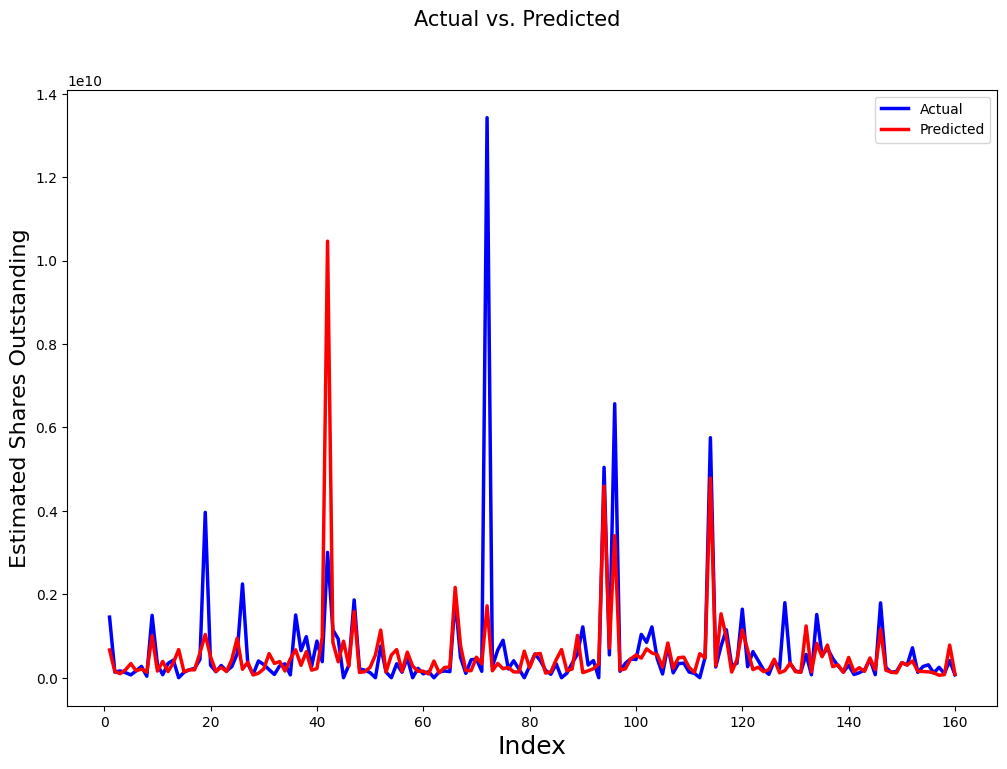

In [33]:
c = [i for i in range(1, 161)] 
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color="blue", linewidth=2.5, label="Actual")
plt.plot(c, y_test_pred, color="red", linewidth=2.5, label="Predicted")
fig.suptitle('Actual vs. Predicted', fontsize=15)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Estimated Shares Outstanding', fontsize=16)
plt.legend()
plt.show()

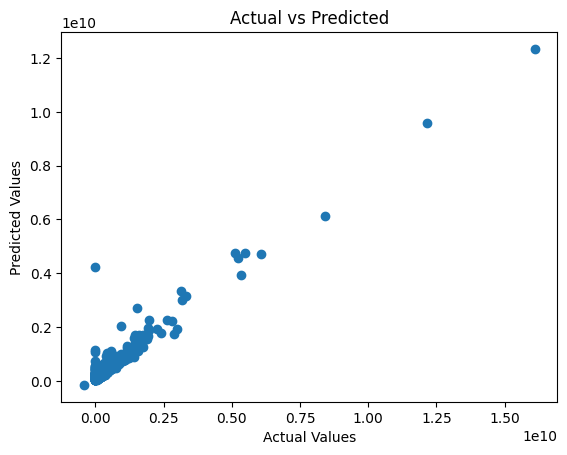

In [34]:
plt.scatter(y_train, y_train_pred_rand)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [35]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})
print("Actual vs Predicted Table:")
display(results_df.head(10))  

Actual vs Predicted Table:


,Actual Values,Predicted Values
696,1.452593e+09,6.650692e+08
667,1.336066e+08,1.477924e+08
63,1.636250e+08,9.855866e+07
533,1.213103e+08,1.905938e+08
66,6.805529e+07,3.380271e+08
621,1.652518e+08,1.671474e+08
346,2.719298e+08,2.070784e+08
490,3.652605e+07,1.338471e+08
760,1.496700e+09,1.005984e+09
456,3.213194e+08,1.599468e+08


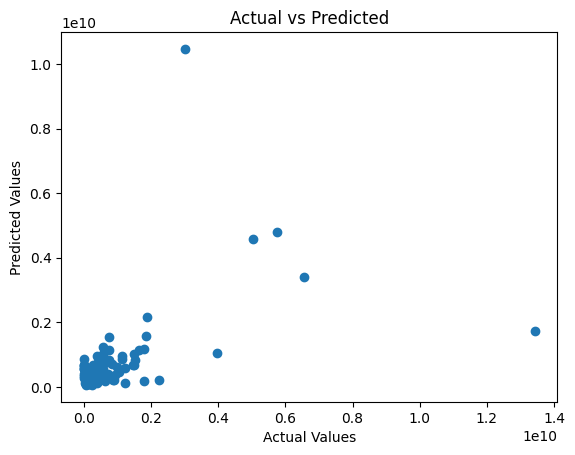

In [36]:
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [37]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})

print("Actual vs Predicted Table:")
display(results_df.head(10))  

Actual vs Predicted Table:


,Actual Values,Predicted Values
696,1.452593e+09,6.650692e+08
667,1.336066e+08,1.477924e+08
63,1.636250e+08,9.855866e+07
533,1.213103e+08,1.905938e+08
66,6.805529e+07,3.380271e+08
621,1.652518e+08,1.671474e+08
346,2.719298e+08,2.070784e+08
490,3.652605e+07,1.338471e+08
760,1.496700e+09,1.005984e+09
456,3.213194e+08,1.599468e+08


## Mulitple Linear Regression vs. Random Forest Regression

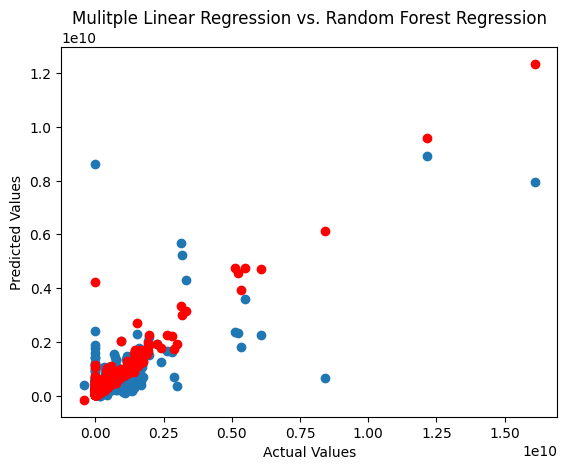

In [38]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_train, y_train_pred_rand, color="red")
plt.title('Mulitple Linear Regression vs. Random Forest Regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [39]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_test_pred
})
print("Actual vs Predicted Table:")
display(results_df.head(10))  

Actual vs Predicted Table:


,Actual Values,Predicted Values
696,1.452593e+09,6.650692e+08
667,1.336066e+08,1.477924e+08
63,1.636250e+08,9.855866e+07
533,1.213103e+08,1.905938e+08
66,6.805529e+07,3.380271e+08
621,1.652518e+08,1.671474e+08
346,2.719298e+08,2.070784e+08
490,3.652605e+07,1.338471e+08
760,1.496700e+09,1.005984e+09
456,3.213194e+08,1.599468e+08


In [40]:
new_data = np.array([[74.96714153, 56.99677718, 8.64964345, 20.46096221, 1,2,3,4,5,6,7,8,9,10,11,1,2,13,14,15,
                        16,17,181,19,20,21,212,23,24,25,26,27,28,29,20,30,31,32,33,344,45,36,37]])  # 43 features
new_data_scaled = sc.transform(new_data) 
new_data_pca = pca.transform(new_data_scaled)
PREDICTION = regressor.predict(new_data_pca)
input_data_str = ''.join(str(x) for x in new_data[0]) 
print(f"Input data: [{input_data_str}], Predicted value: {PREDICTION[0]}")

Input data: [74.9671415356.996777188.6496434520.460962211.02.03.04.05.06.07.08.09.010.011.01.02.013.014.015.016.017.0181.019.020.021.0212.023.024.025.026.027.028.029.020.030.031.032.033.0344.045.036.037.0], Predicted value: 73605225.31678197


d:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## I preferred the Simple Linear Regression Algorithm over than  RandomForestRegressor Algorithm